
**Name : H.K.R.L.GUNASEKARA**                            
 
**Index No: 180205H**


# EN2550 2021: Object Counting on a Convey Belt

### Let’s first import required libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

### Let’s load and visualize the template image and the convey belt snapshot at a given time.

Cloning into 'belt'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 256 (delta 133), reused 124 (delta 36), pack-reused 0
Receiving objects: 100% (256/256), 16.47 MiB | 10.62 MiB/s, done.
Resolving deltas: 100% (133/133), done.


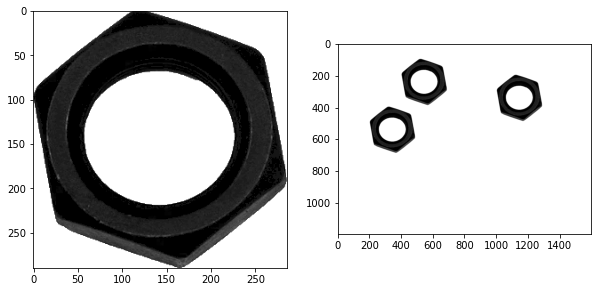

In [2]:
!git clone  https://github.com/RansikaG/EN2550---Machine-Vision belt
template_im = cv.imread(r'/content/belt/Assignment 5/template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'/content/belt/Assignment 5/belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

## Part - I:

### Otsu’s thresholding

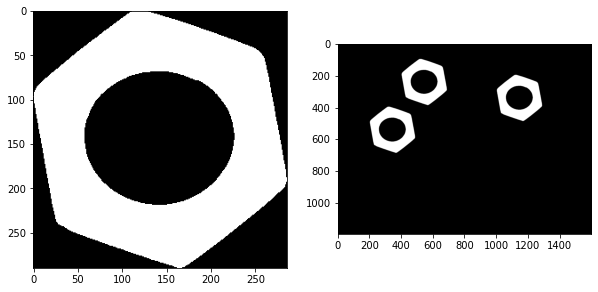

In [3]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

### Morphological closing

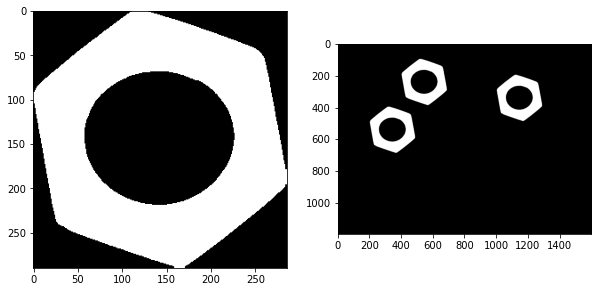

In [4]:
kernel = np.ones((3,3),dtype="uint8")
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

### Connected component analysis

In [5]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

print("retval_t:",retval_t,"   retval_b:",retval_b)
print( centroids_b)

retval_t: 2    retval_b: 4
[[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]


*No of connected Components*

1.  template image : 1
2.  belt image     : 3

*Statistics*

There are 5 stats for each connected component, they are


1.   The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
2.   The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
3. The horizontal size of the bounding box.
4. The vertical size of the bounding box.
5. The total area (in pixels) of the connected component.

stat value of each connected component

|          	| Template  Image 	|              	| Belt  Image 	|            	|
|----------	|-----------------	|--------------	|-------------	|------------	|
|          	| Component 1     	|  Component 1 	| Component 2 	| Component3 	|
| 1) 	| 0               	| 400            	| 1000           	| 200          	|
| 2)      	| 0               	| 100            	| 200           	| 400          	|
| 3)       	| 286               	| 286            	| 286           	| 286          	|
| 4)       	| 290               	| 290            	| 290           	| 290          	|
| 5)       	| 40650               	| 40613            	| 40613           	| 40613          	|



*Centroids*

|              	| Template  Image 	|              	|  Belt  Image  	|              	|
|:------------:	|:---------------:	|:------------:	|:-------------:	|--------------	|
|              	| Component 1     	|  Component 1 	| Component 2   	| Component3   	|
| x coordinate 	| 142.82489545    	| 542.82567158 	| 1142.82567158 	| 342.82567158 	|
| y coordinate 	| 143.780369      	| 243.78479797 	| 343.78479797  	| 543.78479797 	|

### Contour analysis

In [6]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours_b))

6


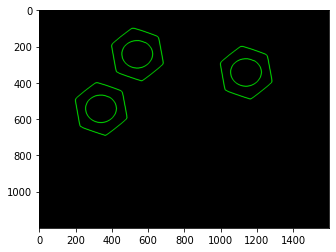

In [7]:
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

### Count the number of matching hexagonal nuts in belt.png.

In [8]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')
belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for j,c in enumerate(belt_cont):
  print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0))

0.00010071698397151607
0.00010071698397928763
0.00010071698397484674


## Part - II

### Count the number of matching hexagonal nuts in belt.png.

In [9]:
cnt = contours_b[1]
ca = cv.contourArea(cnt)
print("ca :",ca)

ca : 20080.0


In [10]:
M = cv.moments(cnt)
cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
print("cx:",cx,"cy:",cy)

cx: 341 cy: 542


In [11]:
"""count=1
object_prev_frame = [cx,cy,ca,count]
object_curr_frame=[cx_cu,cy_cu,ca_cu,count_cu]
delta_x=object_curr_frame[0]-object_prev_frame[0]"""

'count=1\nobject_prev_frame = [cx,cy,ca,count]\nobject_curr_frame=[cx_cu,cy_cu,ca_cu,count_cu]\ndelta_x=object_curr_frame[0]-object_prev_frame[0]'

## Part - III

### (Grading)

In [12]:
def get_indexed_image(im):
  """ Thresholding, closing, and connected component analysis lumped
  """
  th_im, img_im = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  kernel = np.ones((3,3),dtype="uint8")
  closing_im = cv.morphologyEx(img_im, cv.MORPH_CLOSE, kernel)
  retval, labels, stats, centroids= cv.connectedComponentsWithStats(closing_im)
  return retval, labels, stats, centroids

### (Grading)

In [13]:
def is_new(a, b, delta, i):
  """ Vector Dissimilarity with an Array of Vectors
  Checks if vector b is similar to a one or more vectors in a outside the␣
  ,!tolerances specified in delta.
  vector i specifies which elements in b to compare with those in a.
  """
  a=np.array(a)
  b=np.array(b)
  b_=b[i]
  for vector in a:
    vector_=vector[i]
    diff=abs(vector_-b_)
    if np.less_equal(diff, delta).all():
      return False
  return True

In [14]:
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta_x=15
delta = np.array([delta_x,delta_x])
i = np.array([0,1])
assert is_new(a, b, delta, i) == False, " Check the function "

### (Grading)

In [15]:
def prev_index(a, b, delta, i):
  """ Returns Previous Index
  Returns the index of the apppearance of the object in the previous frame.
  (See thee example in the next cell)
  """

  index = -1
  a=np.array(a)
  b=np.array(b)
  b_=b[i]
  for index in range(len(a)):
    vector=a[index]
    vector_=vector[i]
    diff=abs(vector_-b_)
    if np.less_equal(diff, delta).all():
      return index
  return index

In [16]:
# check prev_index expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
assert prev_index(a,b,delta,i) == 1, " Check the function "

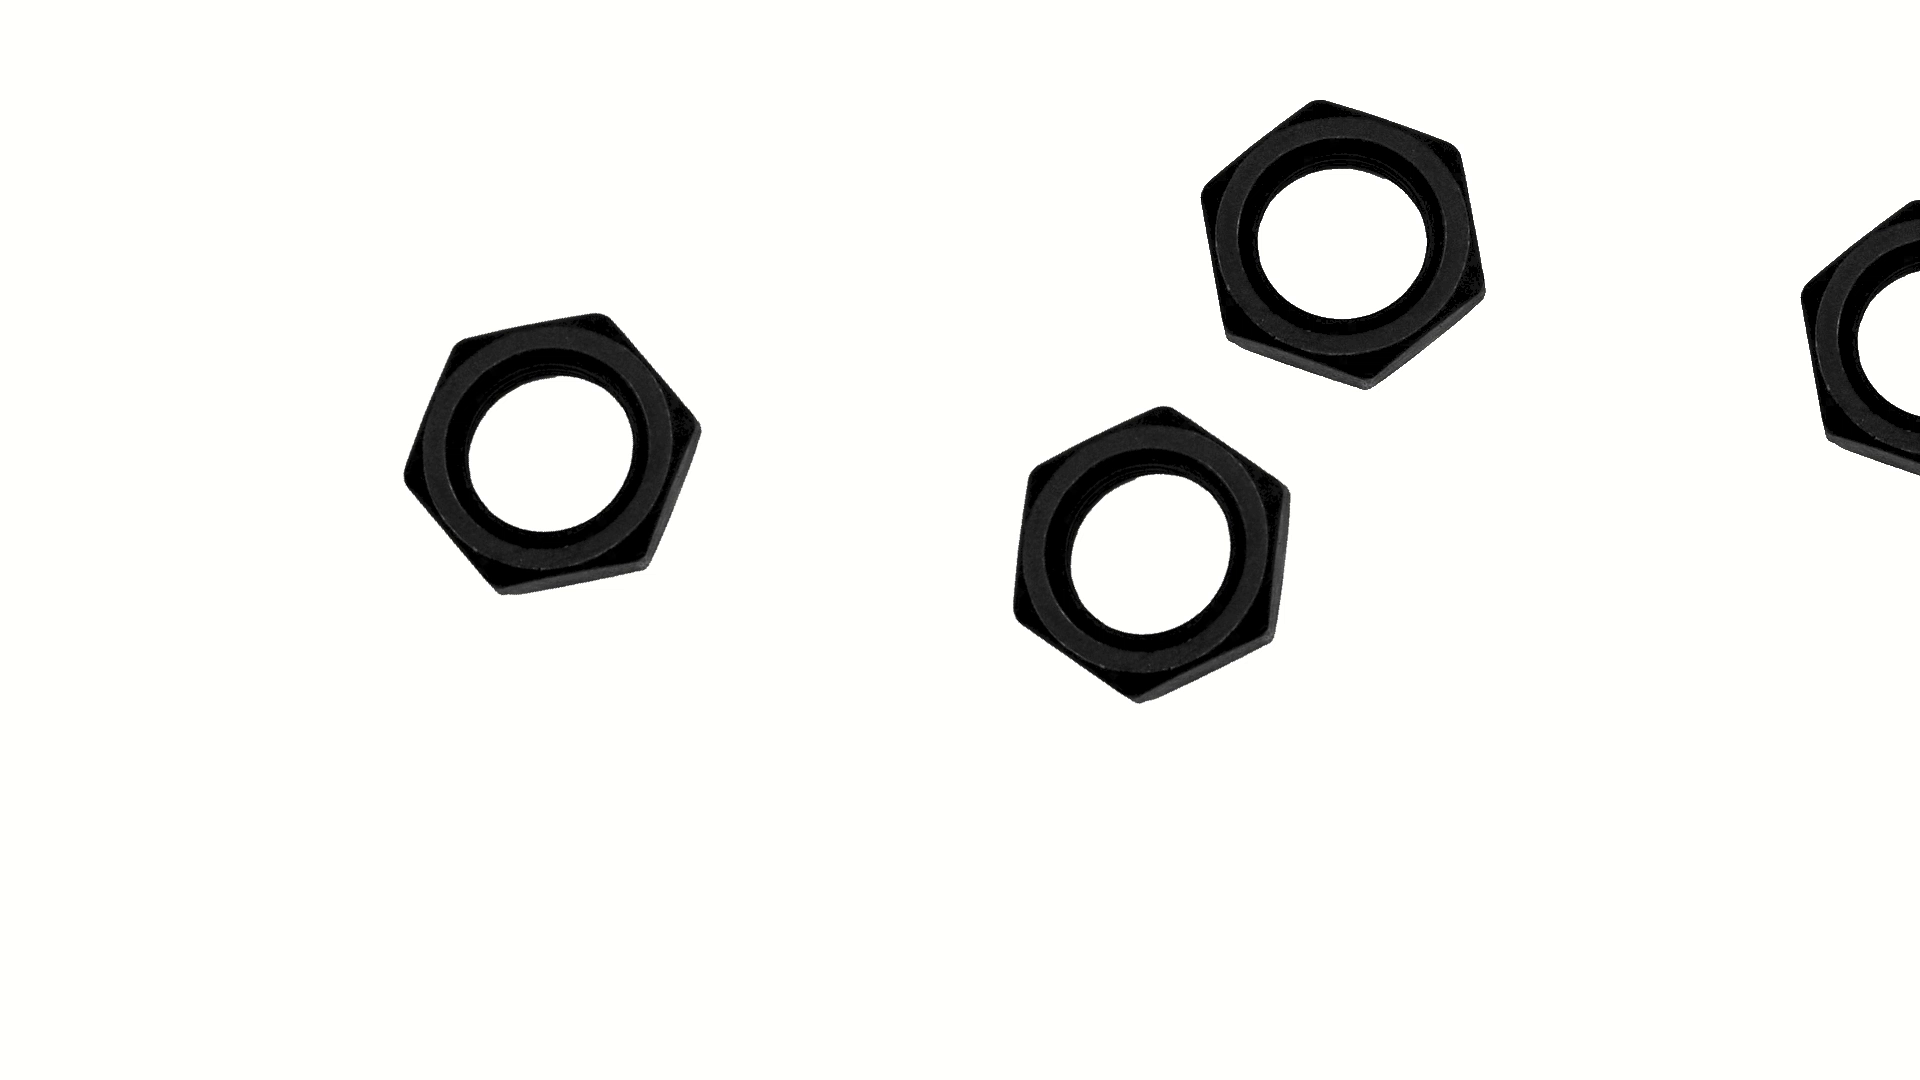

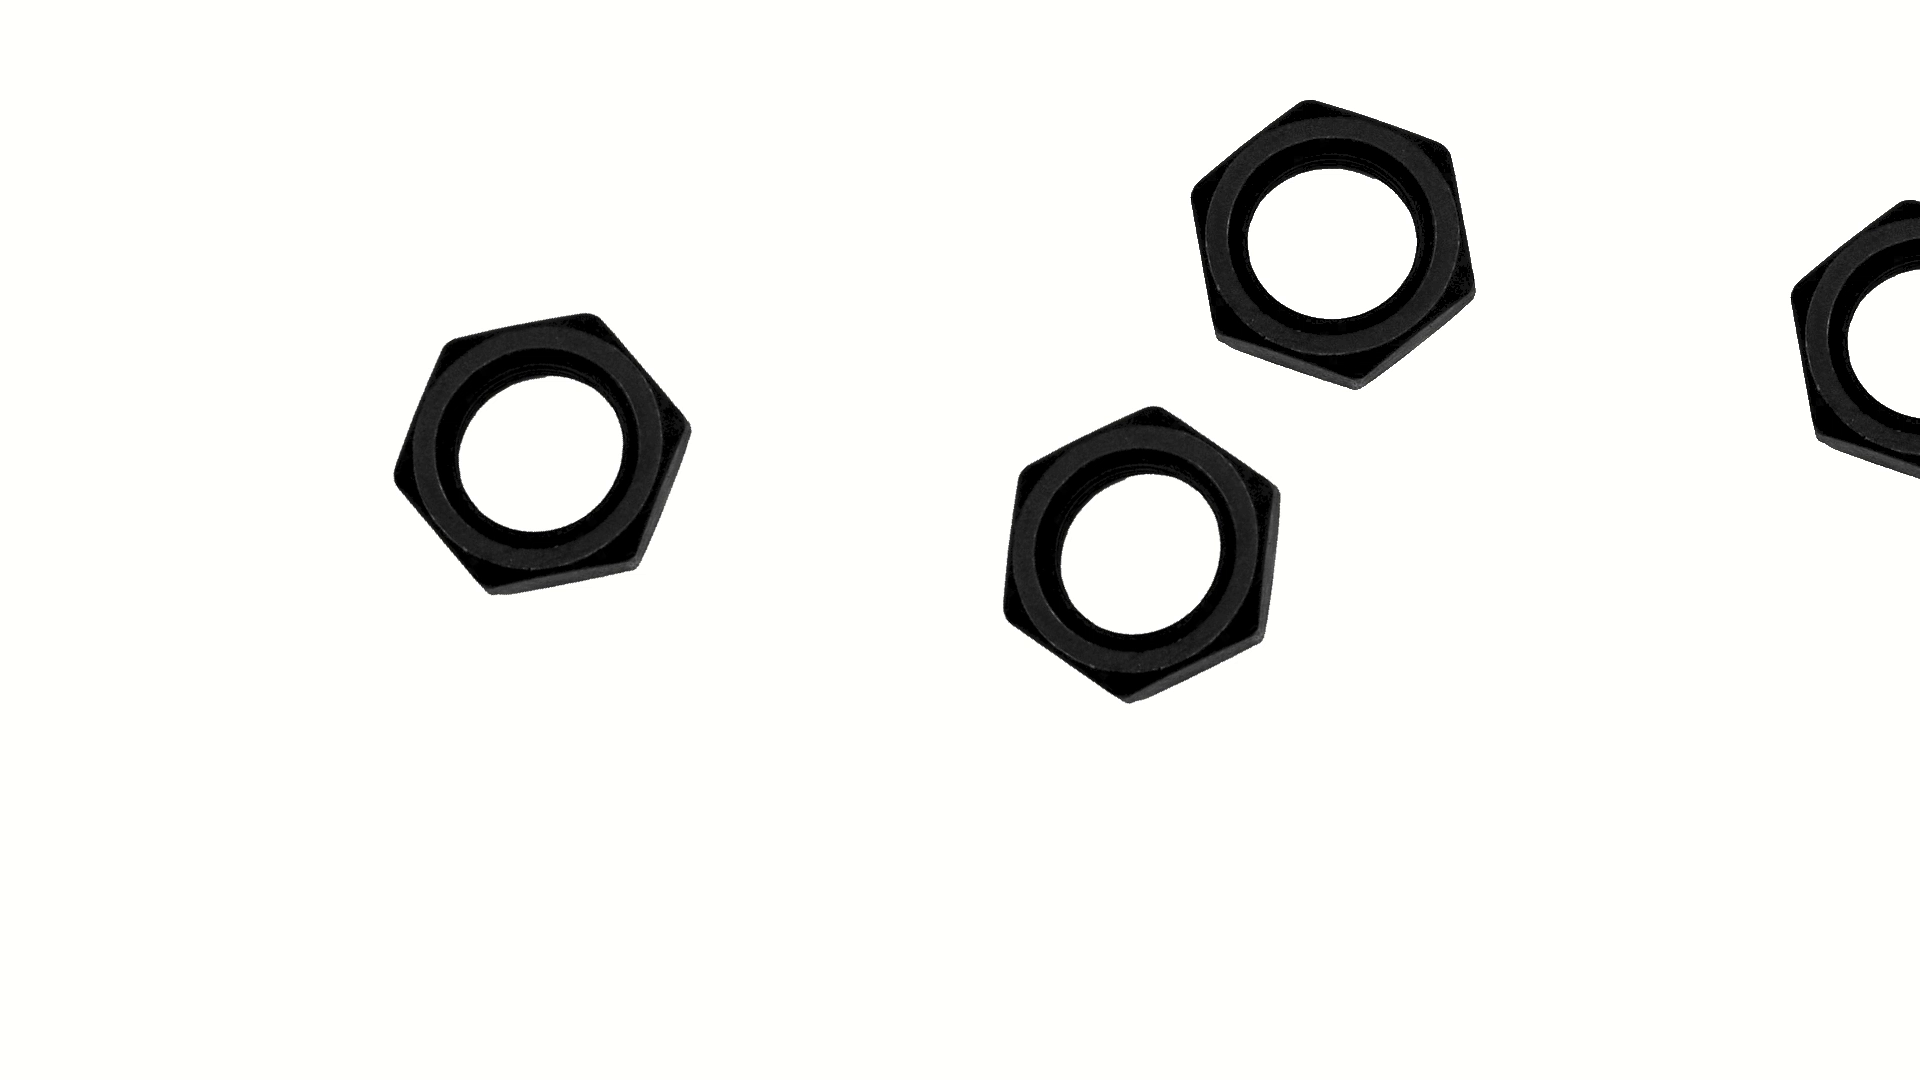

Can't receive frame (stream end?). Exiting ...


In [17]:
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_two_frame.mp4') # give the correct path here
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  cv2_imshow(frame)
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
cv.destroyAllWindows()

## code to detect hexagonal nuts in a moving convey belt

frame 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


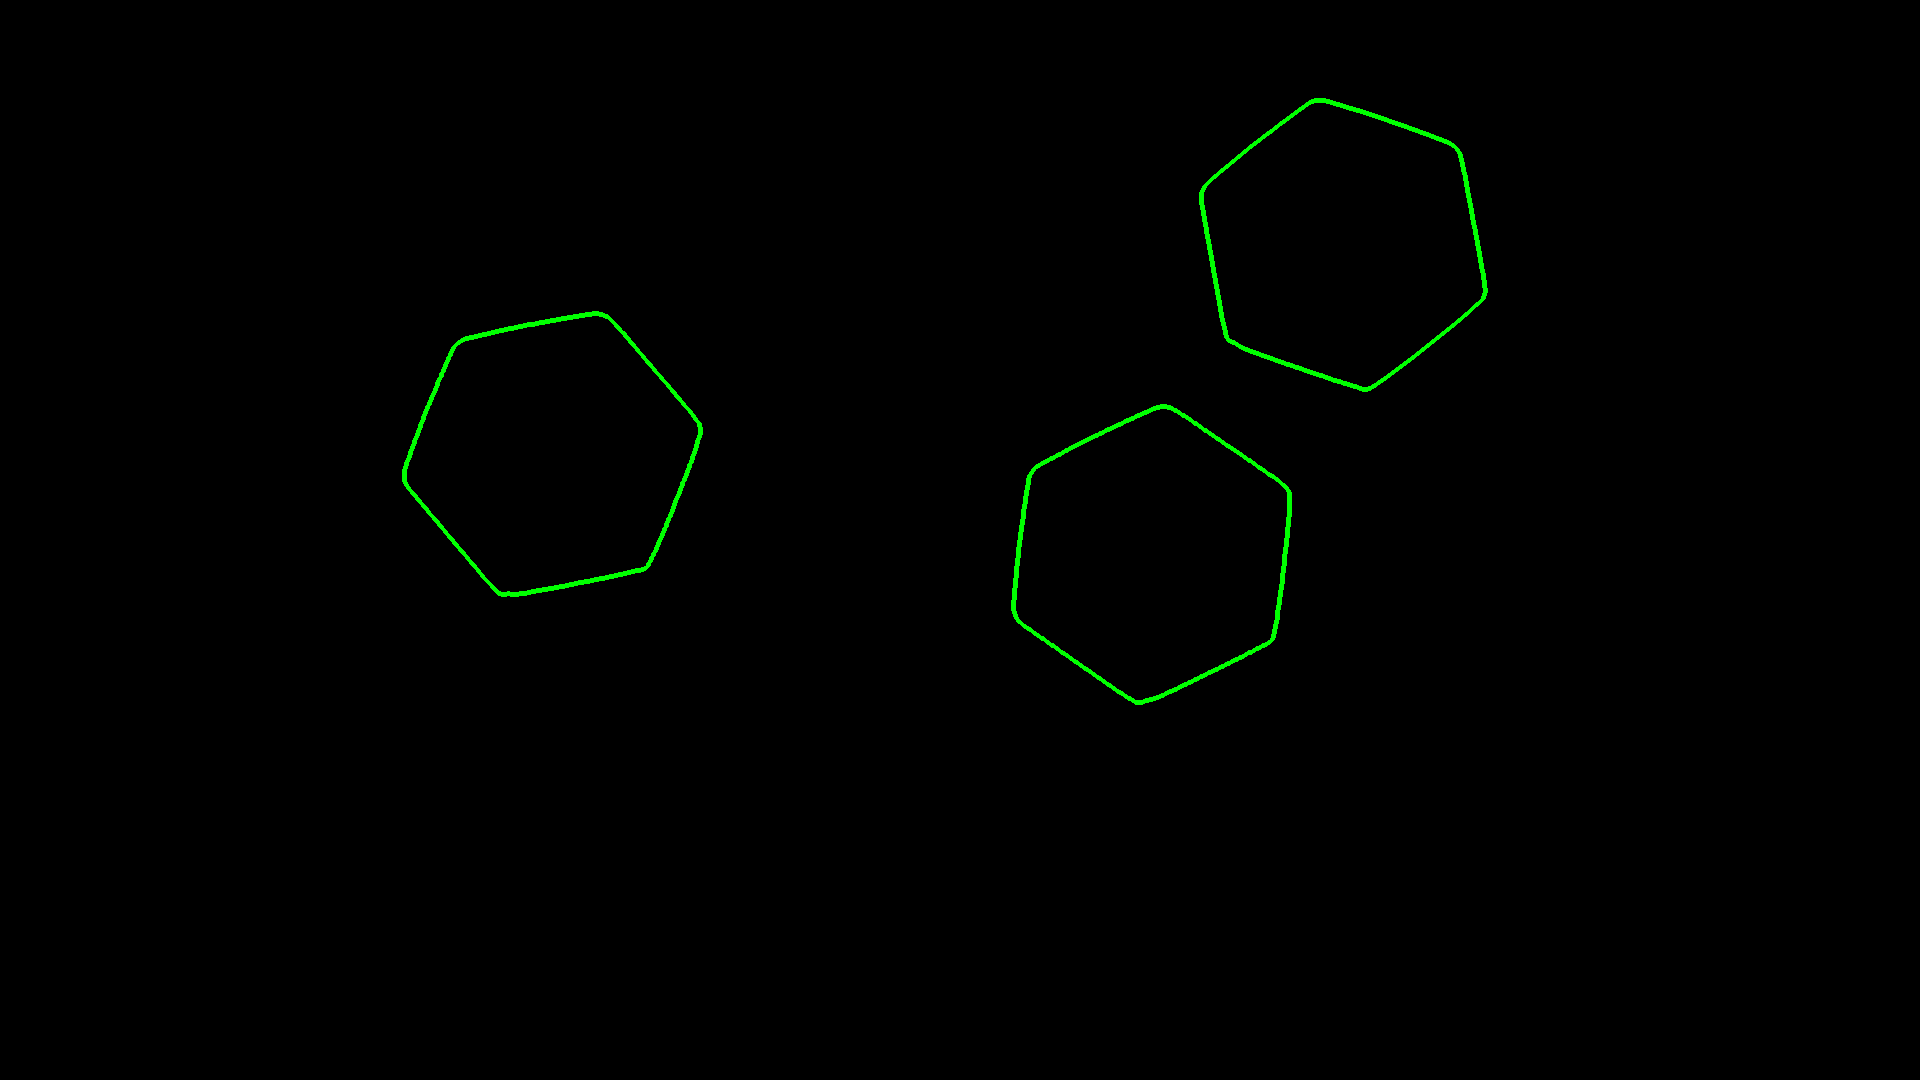

frame 2


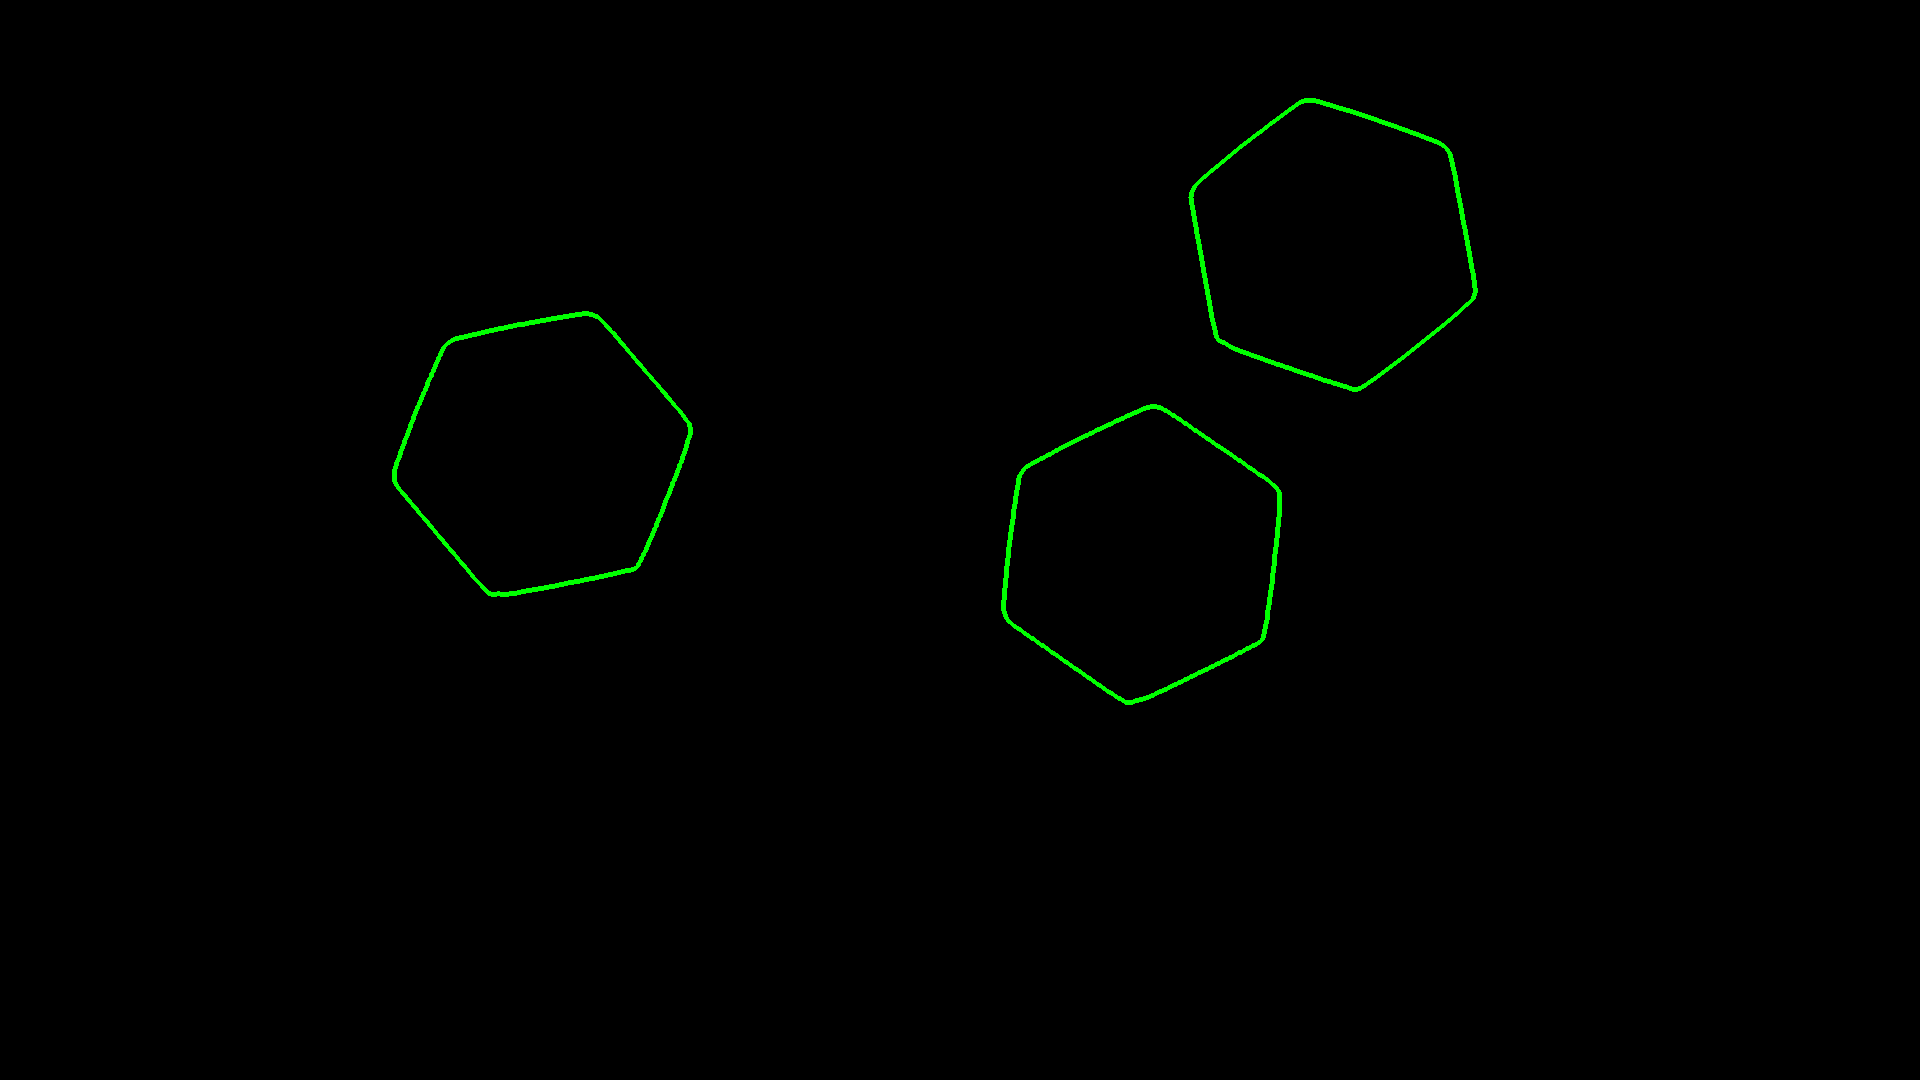

Can't receive frame (stream end?). Exiting ...


In [18]:
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_two_frame.mp4') # give the correct path here
frame_no=1
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

  retval, labels, stats, centroids=get_indexed_image(gray)
  label = 1 # remember that the label of the background is 0
  belt = ((labels >= label)*255).astype('uint8')
  contours, hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  hexagonal=[]
  for j,c in enumerate(contours):
    if cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)<0.001:
      hexagonal.append(j)
  im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)
  Contours = np.array(contours)
  Contours=Contours[hexagonal]
  cont=Contours#Full hexagonal contours are seperated
  
  conts = cv.drawContours(im_contours_belt, cont, -1, (0,255,0), 3).astype('uint8')#contour image

  print("frame",frame_no)
  frame_no+=1
  cv2_imshow(conts)
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
cv.destroyAllWindows()

## Object detection and tracking

In [19]:
def insert_text(current_frame,frame,frame_no):# This function is used to insert text into frames 
  no_objects=len(current_frame)
  bottom_position = (10, frame.shape[0])
  text = "Some text including newline \n characters."
  font_scale = 1
  color = (255, 0, 255)
  thickness = 2
  font = cv.FONT_HERSHEY_SIMPLEX
  line_type = cv.LINE_AA

  text_size, _ = cv.getTextSize(text, font, font_scale, thickness)
  line_height = text_size[1]*2
  x, y0 =bottom_position
  y0-=(no_objects+1)* line_height
  cv.putText(frame,"Index no: 180205H",(10, 50),font,font_scale,(0,0,255),thickness,line_type)
  cv.putText(frame,"Frame"+str(frame_no),(x, y0),font,font_scale,(0,255,0),thickness,line_type)
  for i in range(no_objects):#position stuff
      Object=current_frame[i]
      y = y0 + (i+1)* line_height
      details="Object "+str(Object[3])+": "+str(Object[0])+", "+str(Object[1])+", "+str(Object[2])
      cv.putText(frame,details,(x, y),font,font_scale,color,thickness,line_type)

frame 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


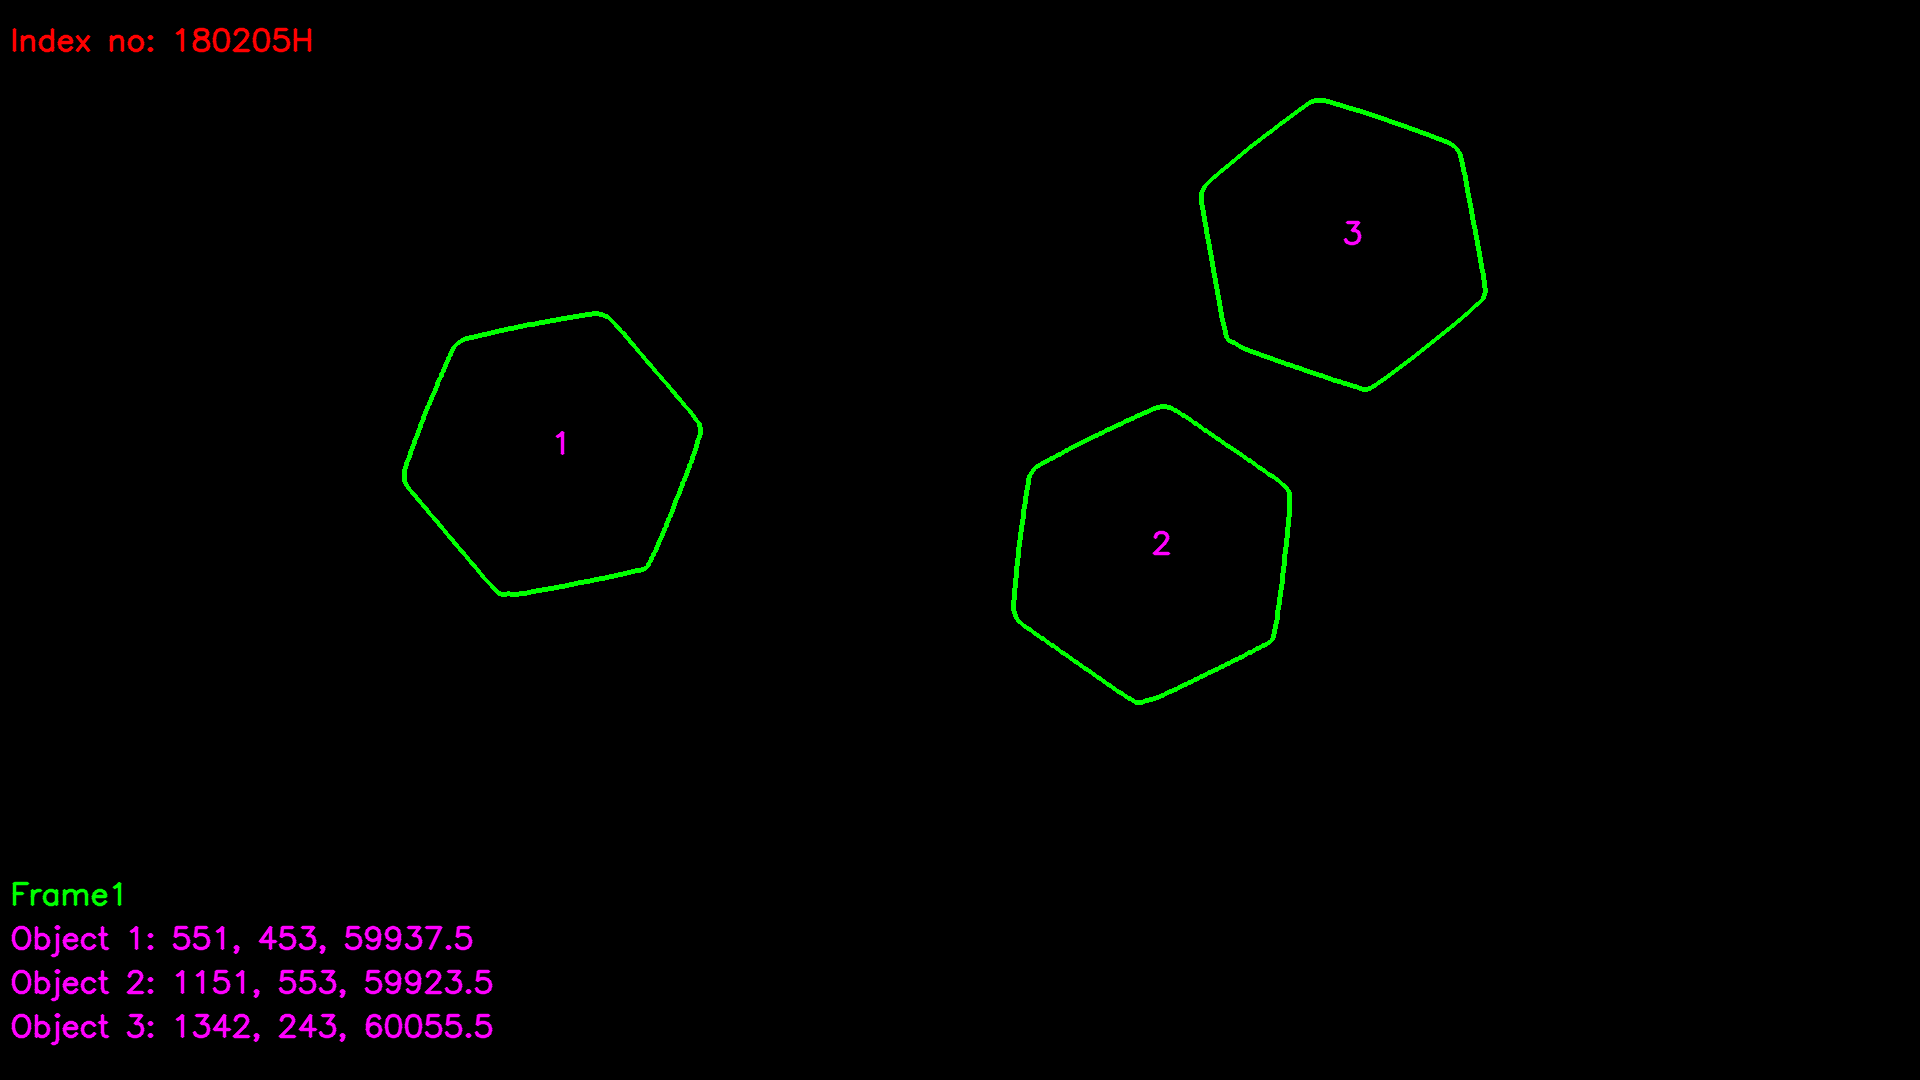

frame 2


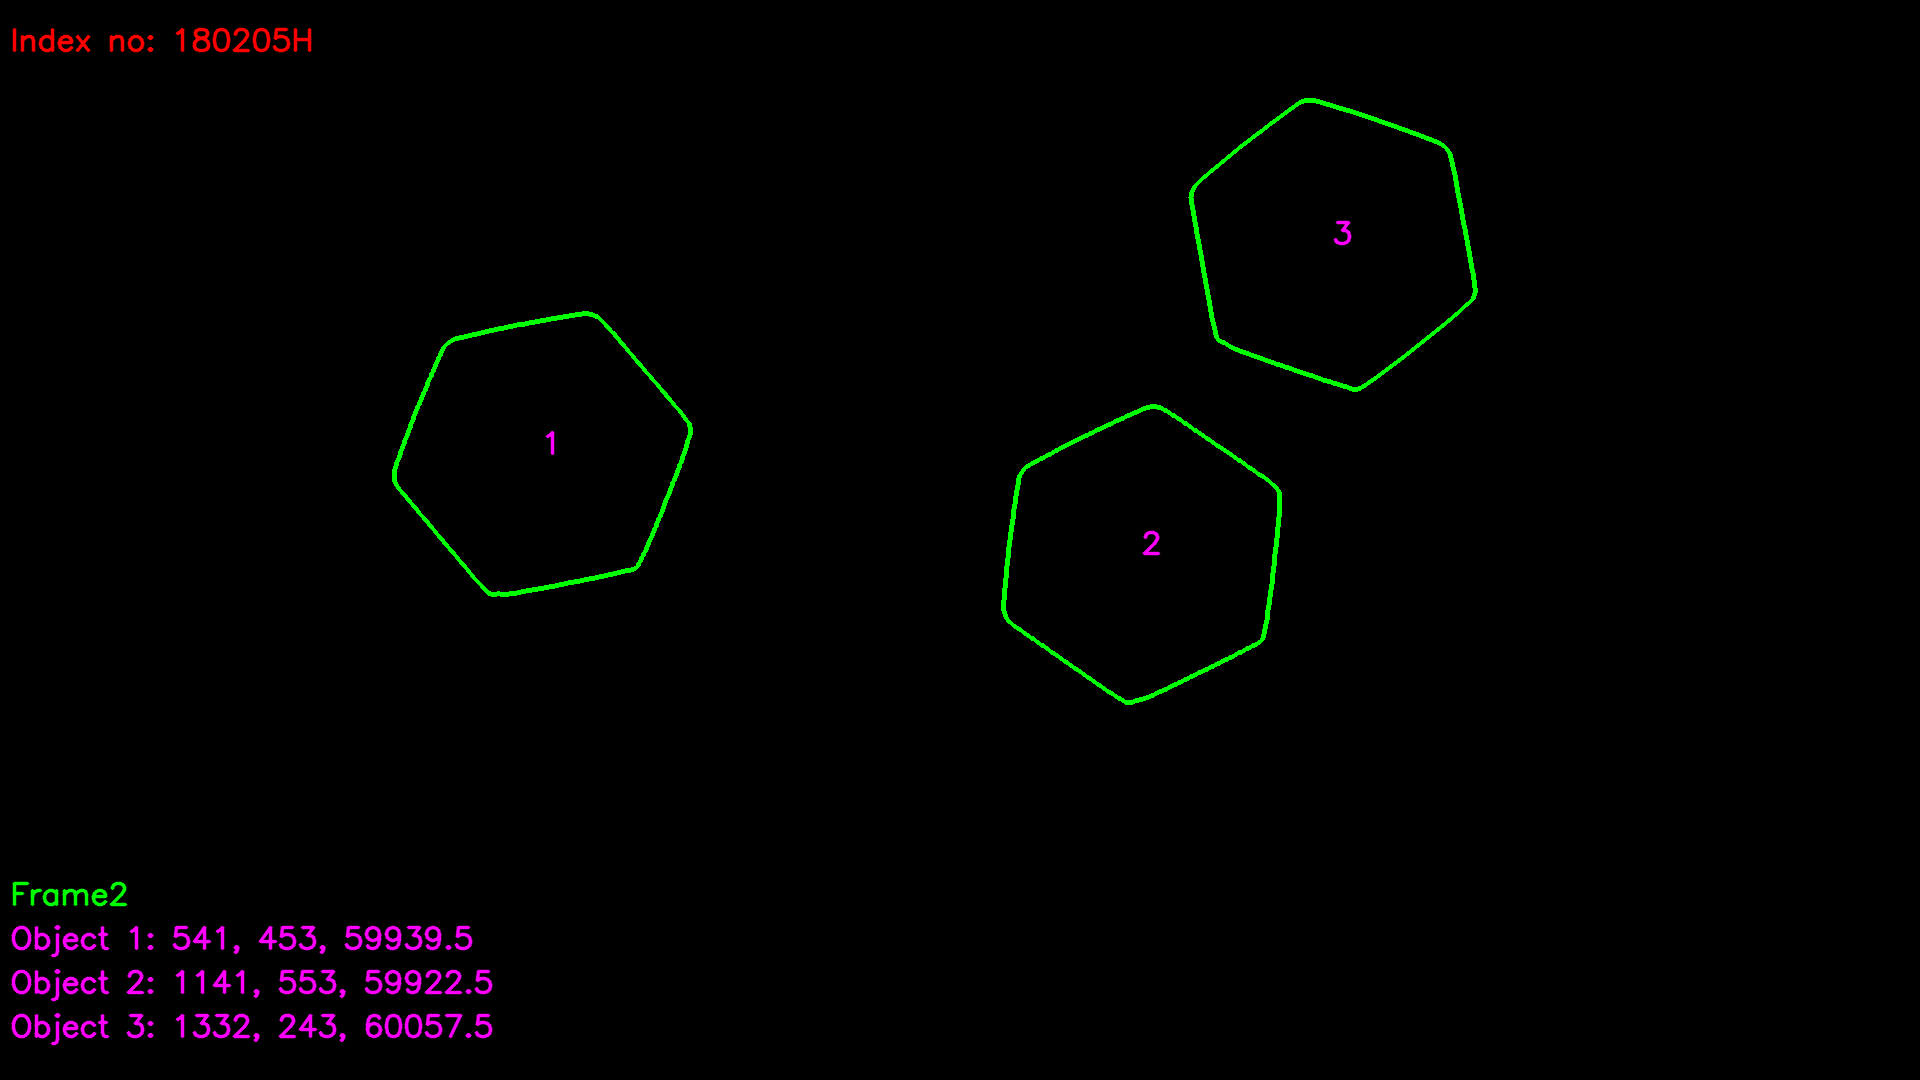

Can't receive frame (stream end?). Exiting ...


In [20]:
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_two_frame.mp4') # give the correct path here
frame_no=1
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

  retval, labels, stats, centroids=get_indexed_image(gray)
  label = 1 # remember that the label of the background is 0
  belt = ((labels >= label)*255).astype('uint8')
  contours, hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  hexagonal=[]
  for j,c in enumerate(contours):
    if cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)<0.5:
      hexagonal.append(j)
  im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), dtype='uint8')
  Contours = np.array(contours)
  Contours=Contours[hexagonal]
  cont=Contours#Full hexagonal contours are seperated
  
  conts = cv.drawContours(im_contours_belt, cont, -1, (0,255,0), 3).astype('uint8')#contour image

  current_frame=[]
  if frame_no==1:
    sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
    for i in range(len(cont)):
      M = cv.moments(sorted_ctrs[i])
      cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
      ca = cv.contourArea(sorted_ctrs[i])
      obj_current_frame=[cx,cy,ca,i+1]
      current_frame.append(obj_current_frame)
      cv.putText(conts,str(obj_current_frame[3]),(obj_current_frame[0],obj_current_frame[1]), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,255),2,cv.LINE_AA)
  else:
    i=[0,1,2]#needs to be rechecked
    delta=[15,15,3000]
    for contour in cont:
      M = cv.moments(contour)
      cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
      ca = cv.contourArea(contour)
      obj_current_frame=[cx,cy,ca,None]#count is not defined
      if is_new(previous_frame, obj_current_frame, delta, i):
        print("new object has entered")
        prev_count+=1
        obj_current_frame=[cx,cy,ca,prev_count]
      else:
        prev_i=prev_index(previous_frame, obj_current_frame, delta, i)
        obj_current_frame=[cx,cy,ca,previous_frame[prev_i][3]]
      current_frame.append(obj_current_frame)
      cv.putText(conts,str(obj_current_frame[3]),(obj_current_frame[0],obj_current_frame[1]), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,255),2,cv.LINE_AA)

   
  current_frame.sort(key=lambda x:x[3],reverse=False)
  insert_text(current_frame,conts,frame_no)
  previous_frame=current_frame
  prev_count=current_frame[-1][3]
  print("frame",frame_no)
  frame_no+=1
  cv2_imshow(conts)
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
cv.destroyAllWindows()

#Conveyor with rotation video tracking

frame 1


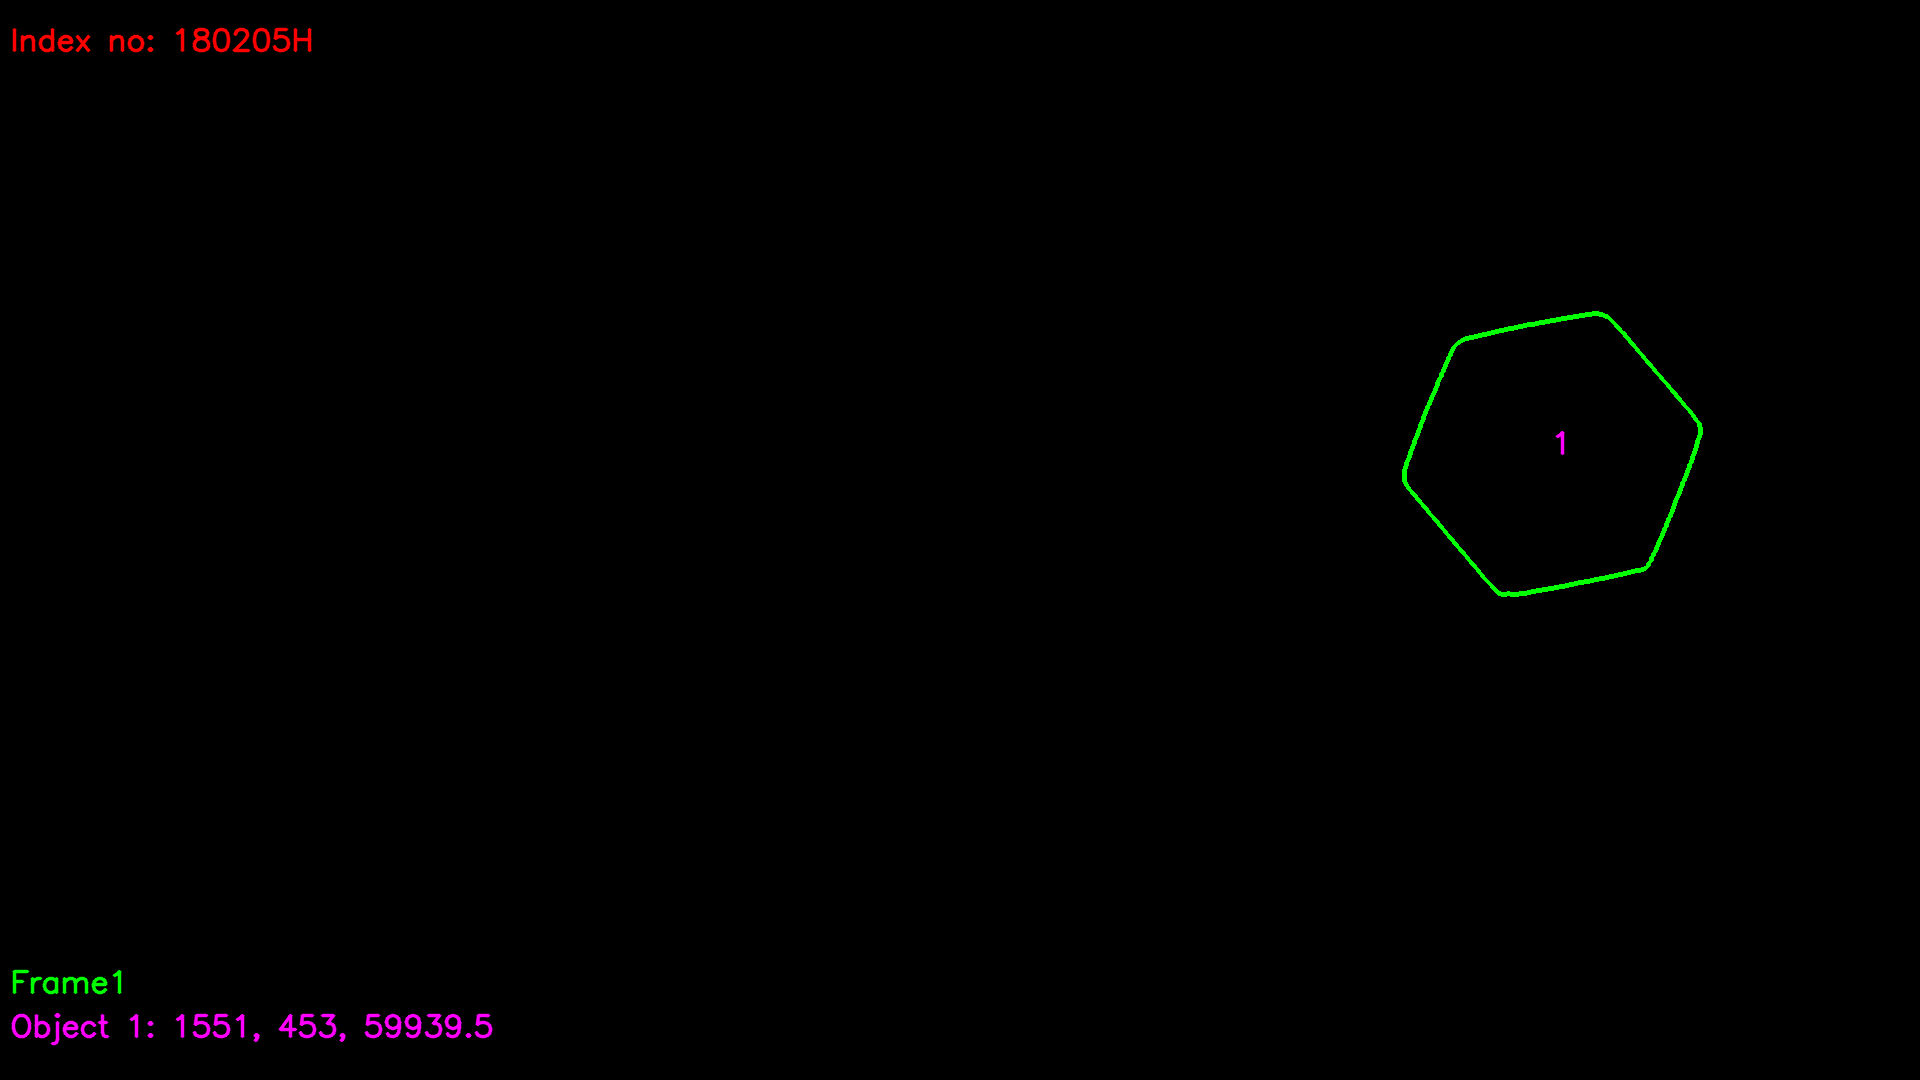

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


new object has entered
frame 41


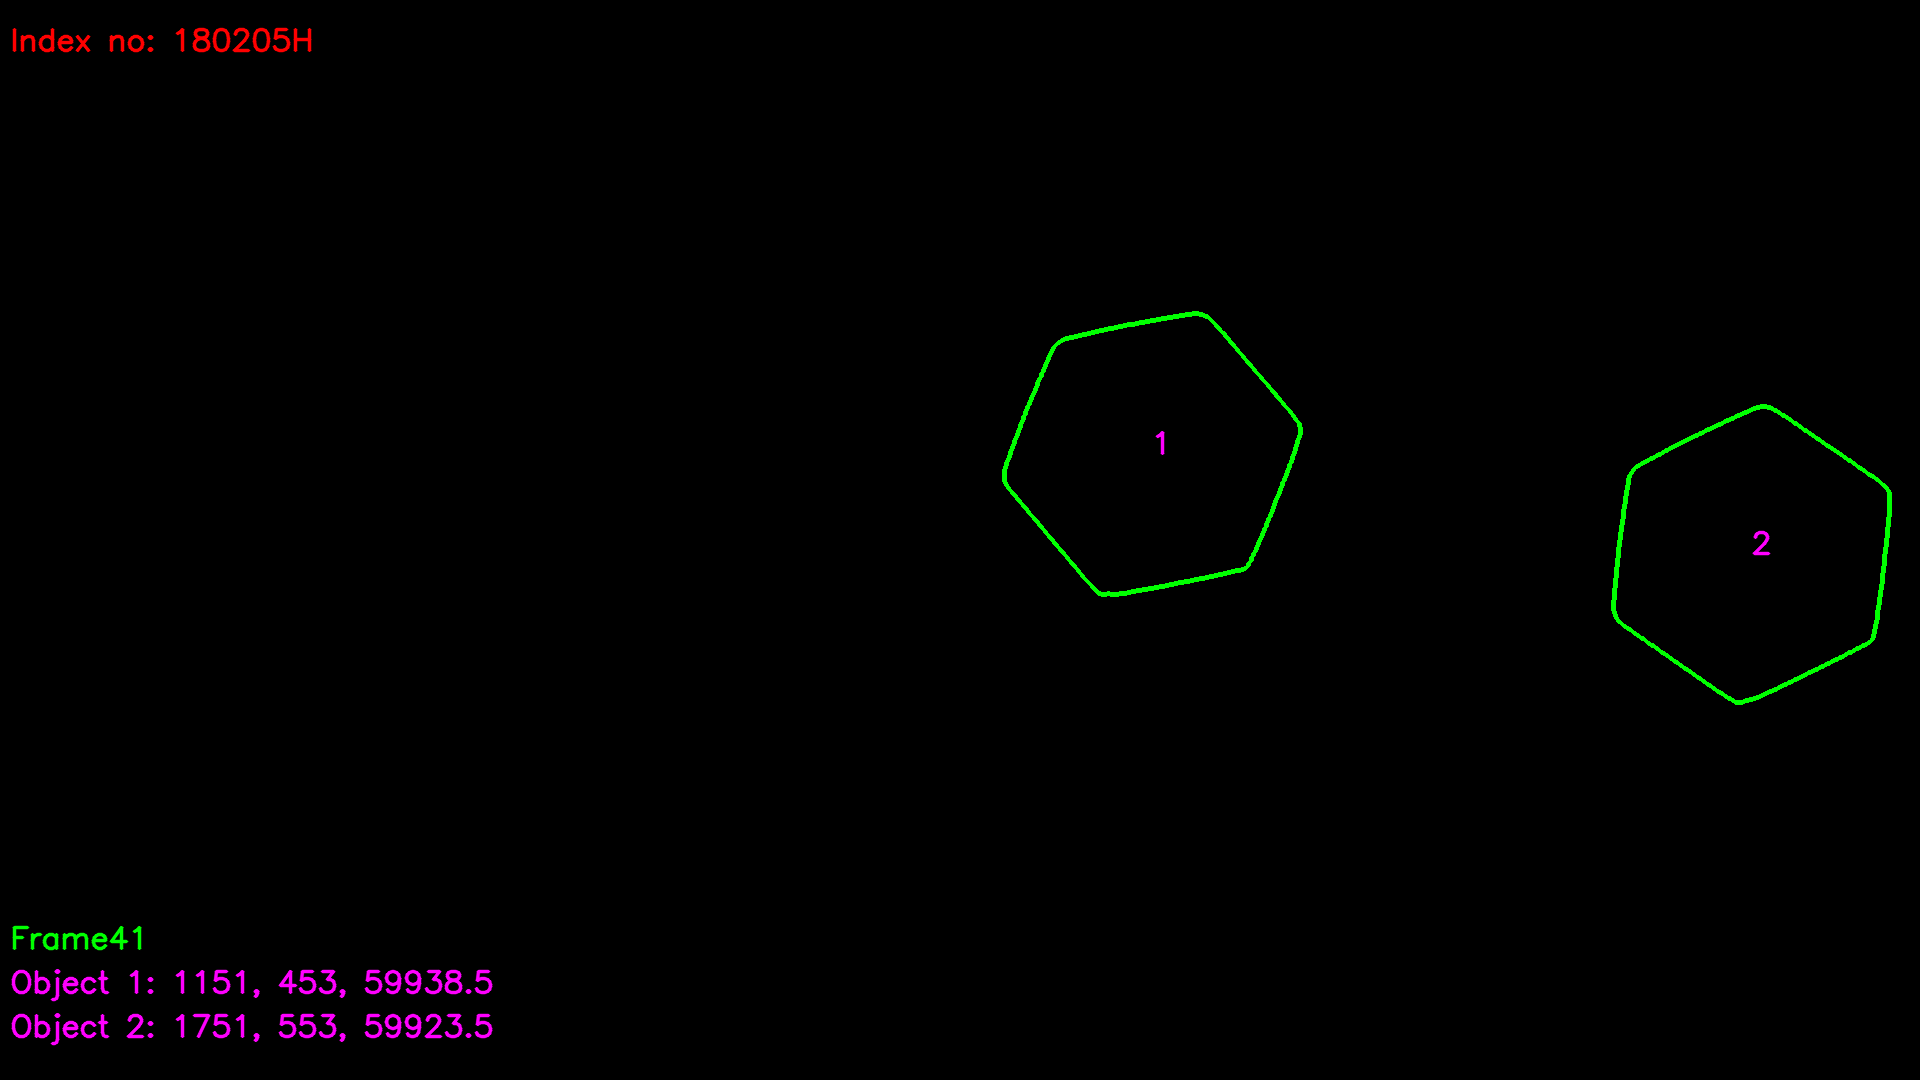

new object has entered
frame 81


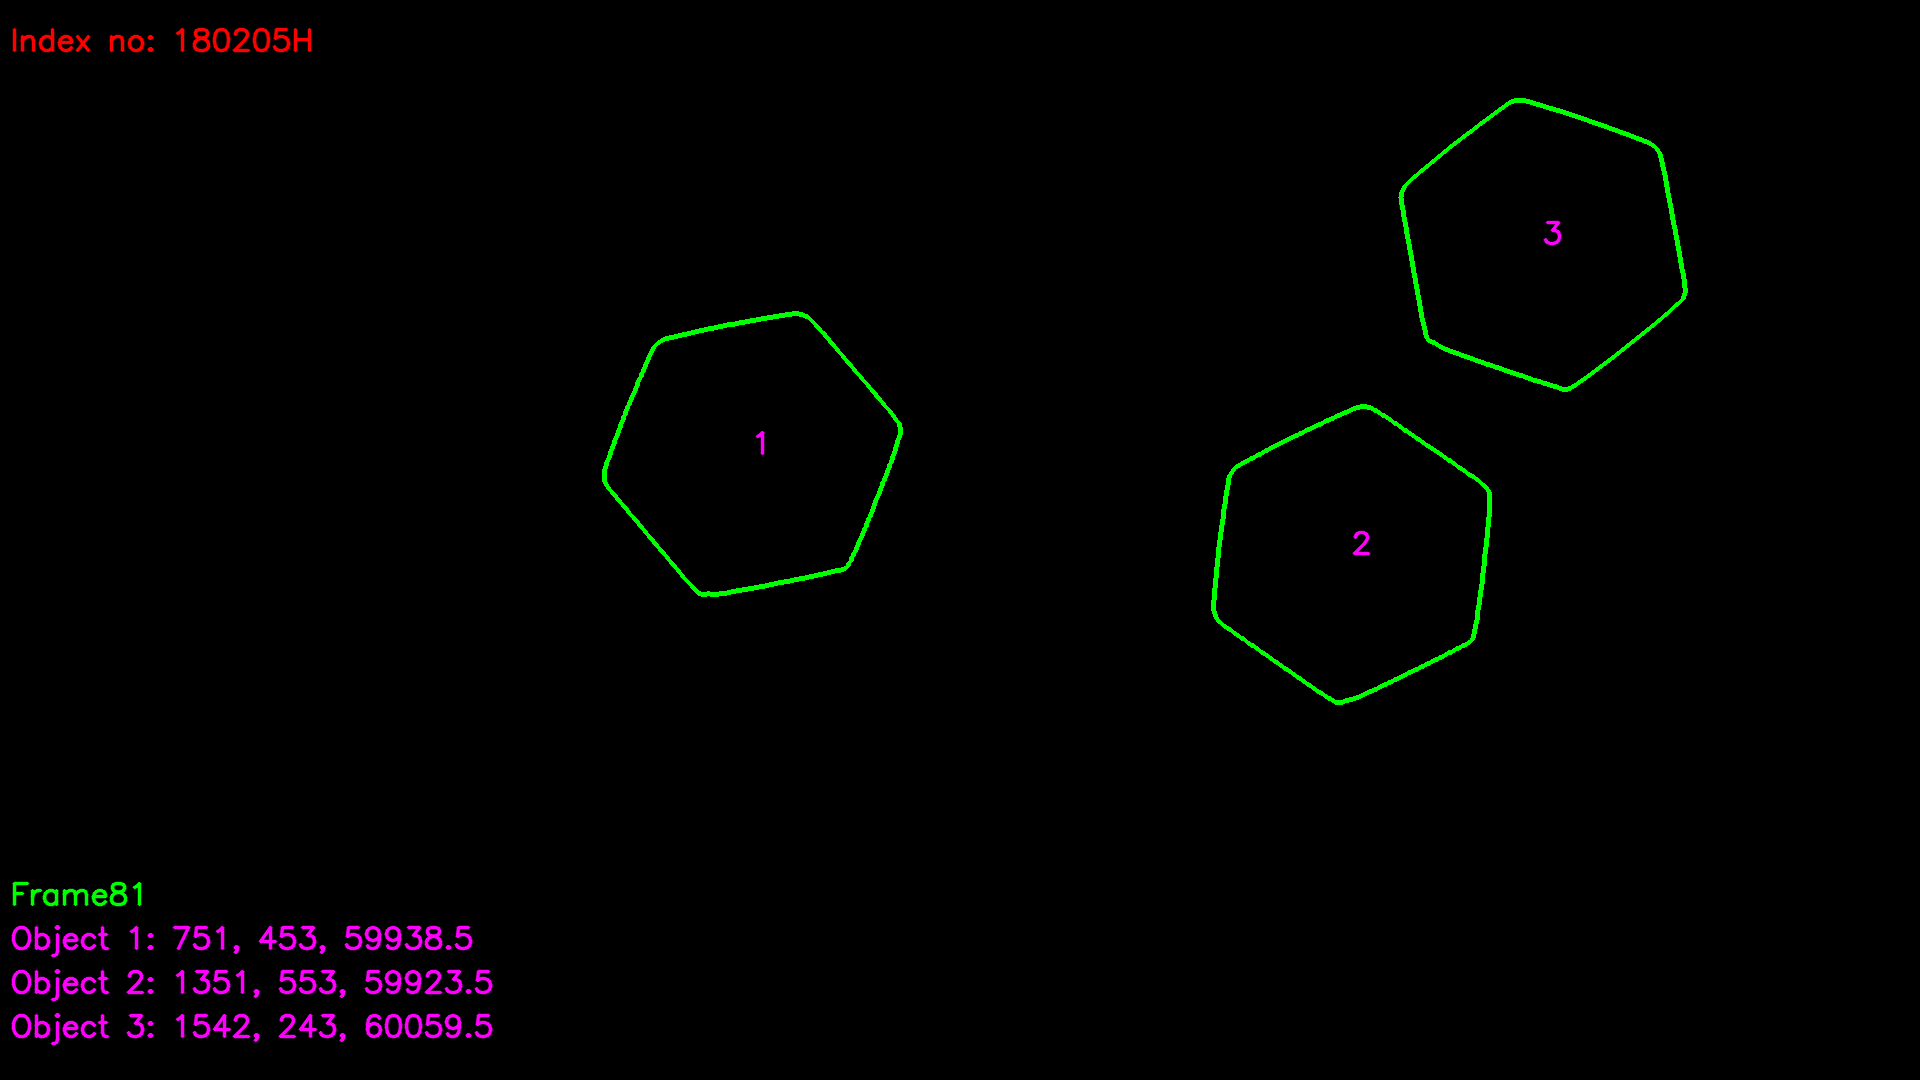

new object has entered
frame 121


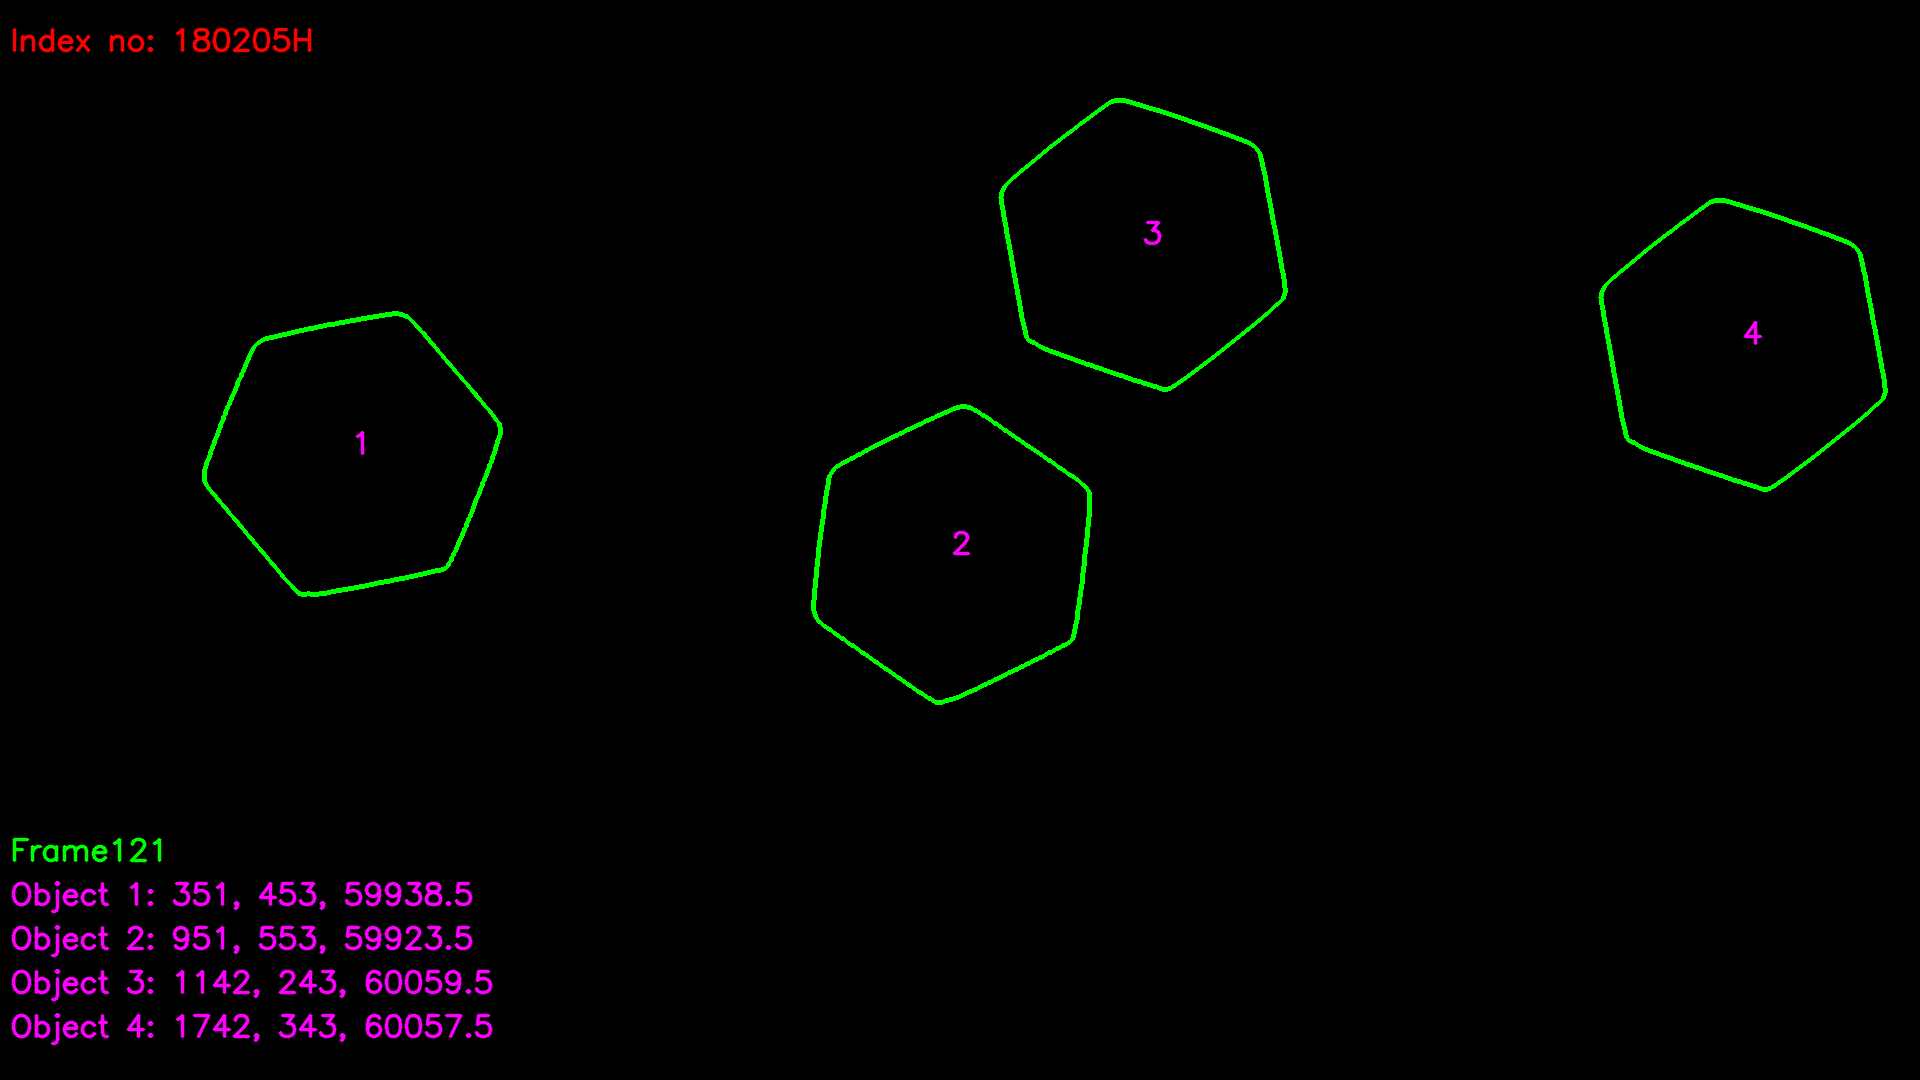

new object has entered
frame 161


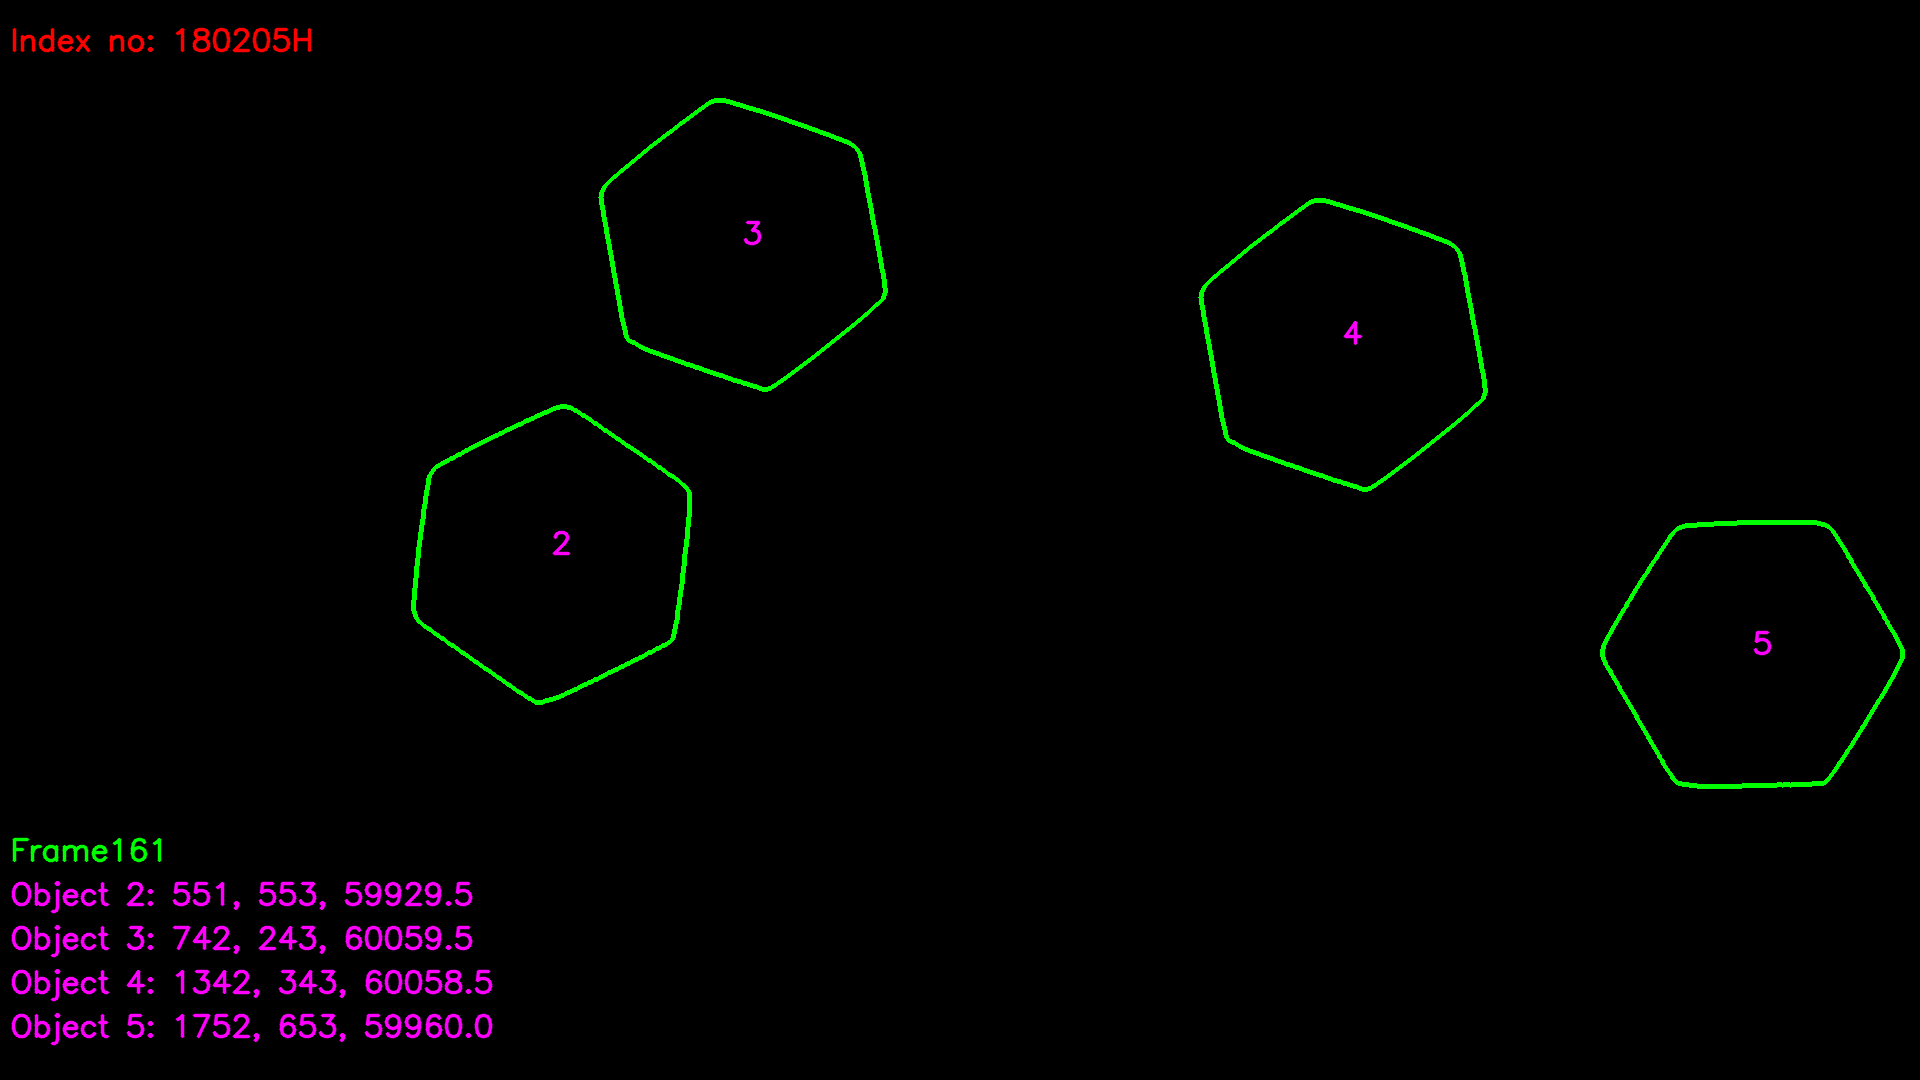

frame 201


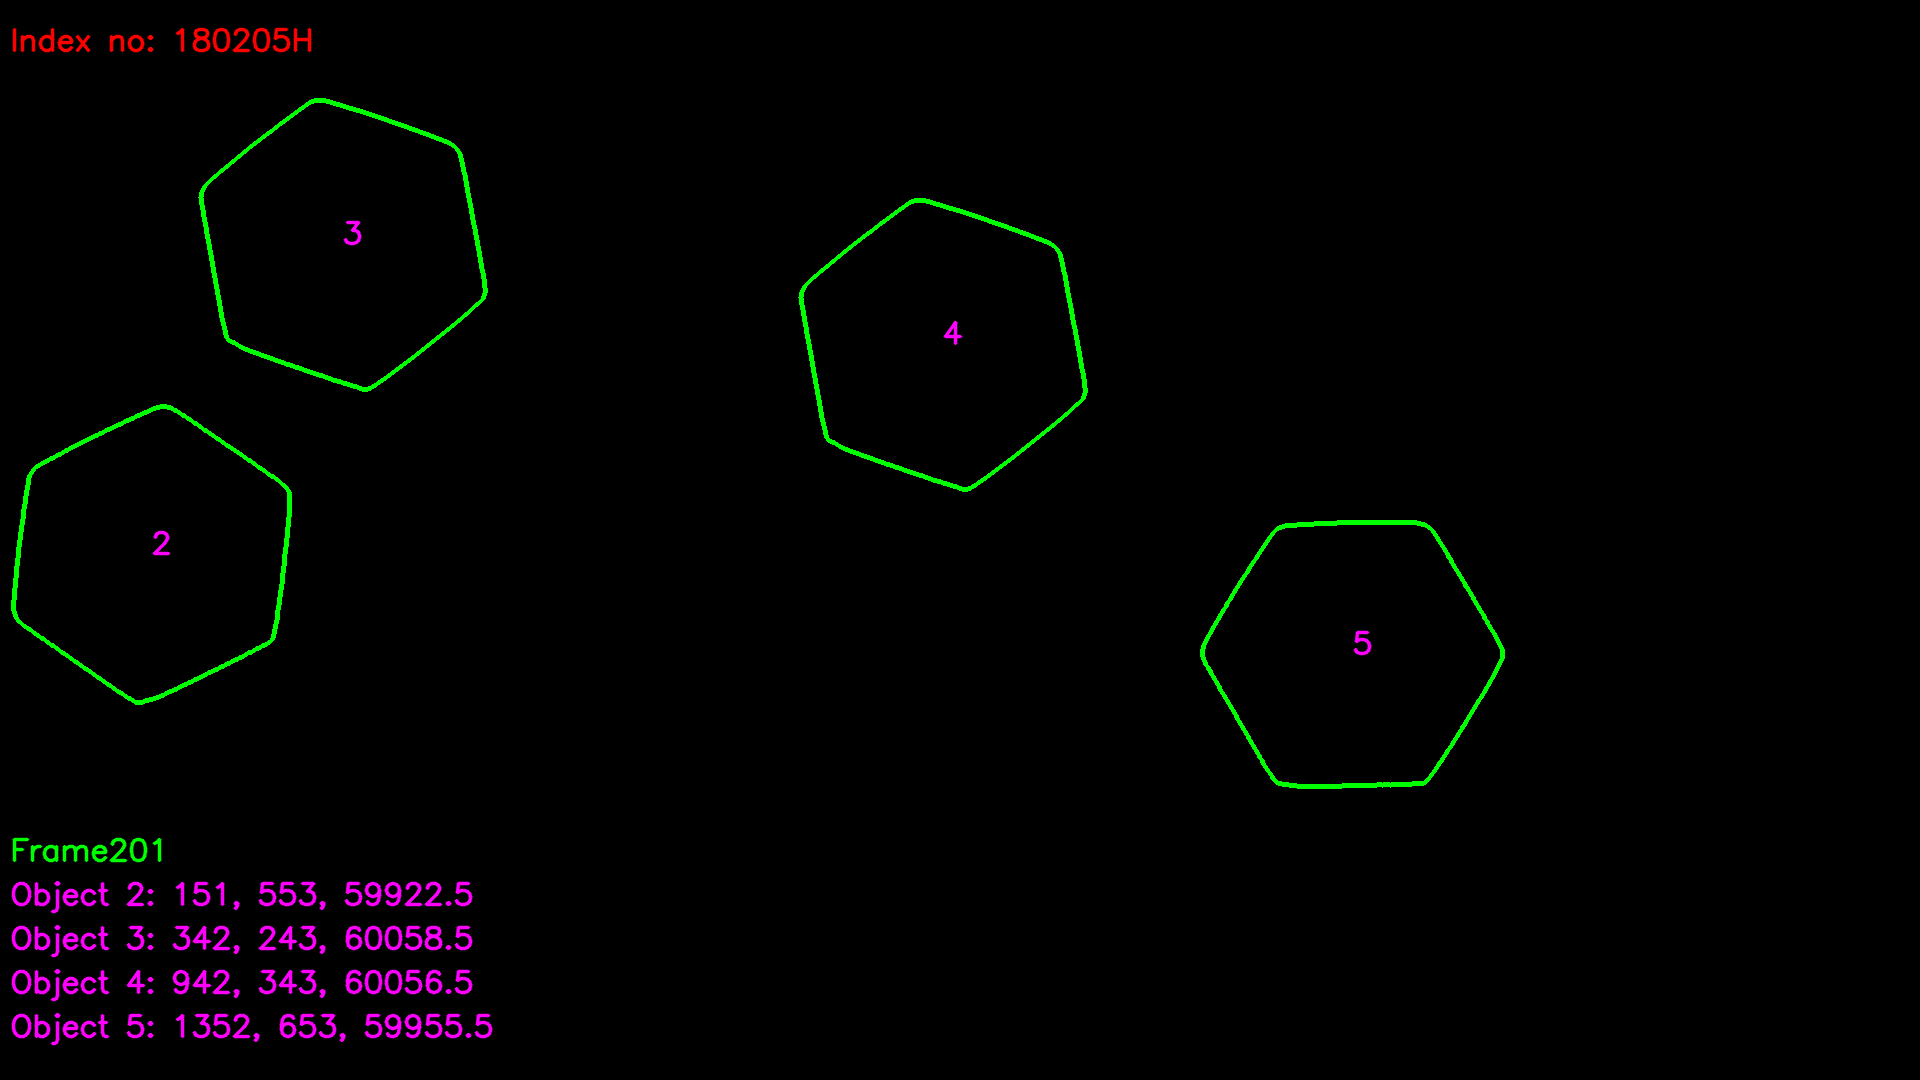

frame 241


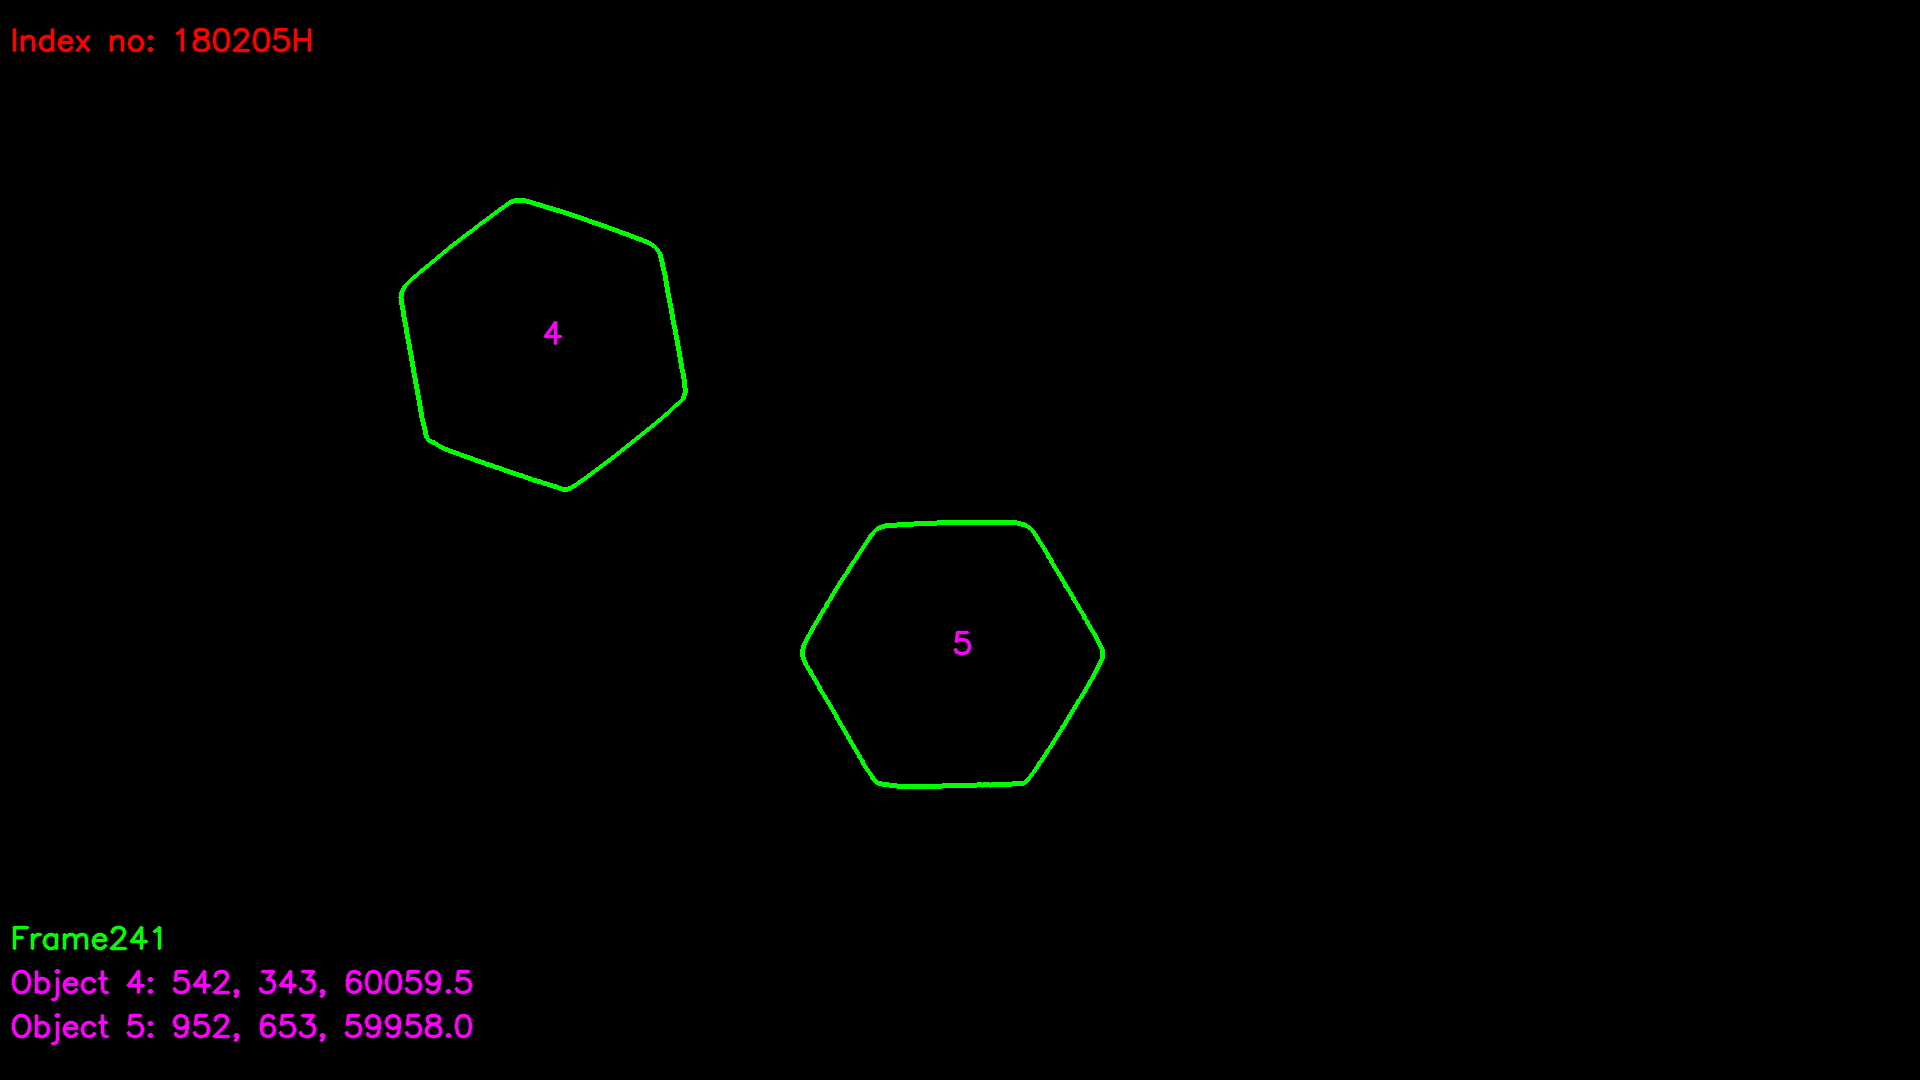

Can't receive frame (stream end?). Exiting ...


In [21]:
#Conveyor with rotation
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_with_rotation.mp4') # give the correct path here
fps = cap.get(cv.CAP_PROP_FPS)
width=int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

out = cv.VideoWriter('180205H_en2550_a05.mp4', cv.VideoWriter_fourcc(*'mp4v'), fps, (width, height), True)
frame_no=1
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

  retval, labels, stats, centroids=get_indexed_image(gray)
  label = 1 # remember that the label of the background is 0
  belt = ((labels >= label)*255).astype('uint8')
  contours, hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  hexagonal=[]
  for j,c in enumerate(contours):
    if cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)<0.5:
      hexagonal.append(j)
  im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), dtype='uint8')
  Contours = np.array(contours)
  Contours=Contours[hexagonal]
  cont=Contours#Full hexagonal contours are seperated
  
  conts = cv.drawContours(im_contours_belt, cont, -1, (0,255,0), 3).astype('uint8')#contour image

  current_frame=[]
  if frame_no==1:
    sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
    for i in range(len(cont)):
      M = cv.moments(sorted_ctrs[i])
      cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
      ca = cv.contourArea(sorted_ctrs[i])
      obj_current_frame=[cx,cy,ca,i+1]
      current_frame.append(obj_current_frame)
      cv.putText(conts,str(obj_current_frame[3]),(obj_current_frame[0],obj_current_frame[1]), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,255),2,cv.LINE_AA)
  else:
    i=[0,1,2]#needs to be rechecked
    delta=[15,15,3000]
    for contour in cont:
      M = cv.moments(contour)
      cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
      ca = cv.contourArea(contour)
      obj_current_frame=[cx,cy,ca,None]#count is not defined
      if is_new(previous_frame, obj_current_frame, delta, i):
        print("new object has entered")
        prev_count+=1
        obj_current_frame=[cx,cy,ca,prev_count]
      else:
        prev_i=prev_index(previous_frame, obj_current_frame, delta, i)
        obj_current_frame=[cx,cy,ca,previous_frame[prev_i][3]]
      current_frame.append(obj_current_frame)
      cv.putText(conts,str(obj_current_frame[3]),(obj_current_frame[0],obj_current_frame[1]), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,255),2,cv.LINE_AA)
  
  current_frame.sort(key=lambda x:x[3],reverse=False)
  insert_text(current_frame,conts,frame_no)
  previous_frame=current_frame
  prev_count=current_frame[-1][3]
  if frame_no%40==1:
    print("frame",frame_no)
    cv2_imshow(conts)
  frame_no+=1
  out.write(conts)
  
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
out.release()

cv.destroyAllWindows()
